<a href="https://colab.research.google.com/github/nishichoudhary/sentiment-analyzer/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!



Classifier Accuracy: 0.9846666666666667

Welcome to the Sentiment Analyzer!

Enter a tweet (or type 'exit' to quit):

User: Just got offered a job in a new city! Super excited for the opportunity, but also feeling nervous about leaving my friends and family behind. 🎉😬
Sentiment Analysis Result: positive

User: The salary is great, and I've always wanted to live in that city. It's a dream come true in many ways. 💰🏙️
Sentiment Analysis Result: neutral

User: On the downside, I'll miss my current colleagues and the comfort of familiar surroundings. It's a bittersweet moment. 😔😕
Sentiment Analysis Result: negative

User: But, I'm ready for a new adventure and to grow both personally and professionally. Change can be scary but also exhilarating! 💪😊
Sentiment Analysis Result: positive

User: Decisions, decisions... Feeling a mix of excitement and apprehension, but leaning towards accepting the offer. 🤔🎢
Sentiment Analysis Result: neutral

User: exit


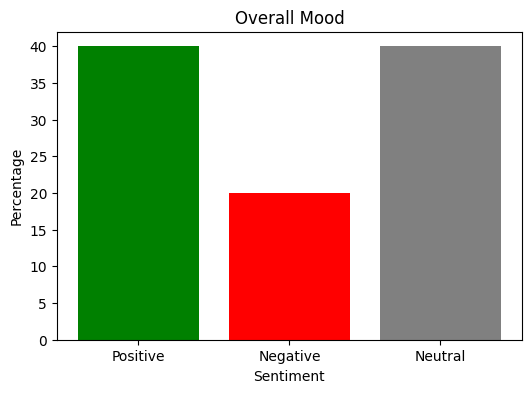

In [ ]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.classify import NaiveBayesClassifier
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download the Twitter sample dataset
nltk.download('twitter_samples')

# Load positive, negative, and neutral tweets from the Twitter sample dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
neutral_tweets = twitter_samples.strings('tweets.20150430-223406.json')

# Tokenize tweets using TweetTokenizer from NLTK
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
positive_tweet_tokens = [tweet_tokenizer.tokenize(tweet) for tweet in positive_tweets]
negative_tweet_tokens = [tweet_tokenizer.tokenize(tweet) for tweet in negative_tweets]
neutral_tweet_tokens = [tweet_tokenizer.tokenize(tweet) for tweet in neutral_tweets]

# Define feature extractor function
def build_freq_features(words):
    """
    Build frequency dictionary of words
    :param words: list of words
    :return: dictionary with word frequencies
    """
    word_freq = FreqDist(words)
    return word_freq

# Extract features from positive, negative, and neutral tweets
positive_features = [(build_freq_features(tweet), 'Positive') for tweet in positive_tweet_tokens]
negative_features = [(build_freq_features(tweet), 'Negative') for tweet in negative_tweet_tokens]
neutral_features = [(build_freq_features(tweet), 'Neutral') for tweet in neutral_tweet_tokens]

# Combine the datasets and shuffle
all_features = positive_features + negative_features + neutral_features
import random
random.shuffle(all_features)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(all_features) * split_ratio)
train_set = all_features[:split_index]
test_set = all_features[split_index:]

# Train Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Evaluate classifier on test set
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print("\nClassifier Accuracy:", accuracy)

# Perform sentiment analysis on custom tweets provided by the user
print("\nWelcome to the Sentiment Analyzer!\n")
print("Enter a tweet (or type 'exit' to quit):")

sentiment_mapping = {
    'Positive': 'positive',
    'Negative': 'negative',
    'Neutral': 'neutral'
}

def analyze_sentiment(tweet):
    """
    Analyze sentiment of a tweet
    :param tweet: input tweet
    :return: sentiment analysis result
    """
    custom_tweet_tokens = tweet_tokenizer.tokenize(tweet)
    custom_tweet_features = build_freq_features(custom_tweet_tokens)
    sentiment = classifier.classify(custom_tweet_features)

    return sentiment_mapping[sentiment]

# Analyze custom tweets and visualize overall mood
user_tweets = []
while True:
    custom_tweet = input("\nUser: ")
    if custom_tweet.lower() == 'exit':
        break

    sentiment = analyze_sentiment(custom_tweet)
    print("Sentiment Analysis Result:", sentiment)
    user_tweets.append(sentiment)

# Calculate overall mood
positive_count = user_tweets.count('positive')
negative_count = user_tweets.count('negative')
neutral_count = user_tweets.count('neutral')
total_tweets = len(user_tweets)

positive_percentage = (positive_count / total_tweets) * 100
negative_percentage = (negative_count / total_tweets) * 100
neutral_percentage = (neutral_count / total_tweets) * 100

# Visualize overall mood
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative', 'Neutral'], [positive_percentage, negative_percentage, neutral_percentage], color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Overall Mood')
plt.show()
